In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
file_id = "1nNvEqFcERt4Ltt1P1N7agKMi1RiK_I3H"
download_link = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(download_link)

# Pandas cuts the amount of numbers shown and I want to reduce them in the view.

df.style.format({col: "{:.2f}" for col in df.select_dtypes(include='number').columns})
df.head(5)

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,349895.0107,73580,12072,682,59417
1,A,1/13/2018,787,904,110,506270.2176,11804,9499,853,56806
2,A,1/20/2018,81,970,742,430042.1538,52232,17048,759,48715
3,A,1/27/2018,25,575,65,417745.6658,78640,10207,942,72047
4,A,2/3/2018,565,284,295,408505.8012,40561,5834,658,56235


This dataset shows the weekly impressions per channel.
<br> Let's check if there are null values in the dataset.

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
dtype: int64


There is no need of data cleaning, but for a better overview is useful to group by the impressions per year.

In [17]:
df['year'] = df['Calendar_Week'].str[-4:]
df_grouped = df.groupby('year')[['Paid_Views', 'Organic_Views', 'Google_Impressions', 
                                 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions', 'Sales']].sum()
df_grouped

,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
year,,,,,,,
2018,3178323,2108887,1021849563,1.111156e+09,250071734,36390020,247357254
2019,34517944,29919423,1502113795,1.009303e+09,506208855,29390984,277286137
2020,8355349,8719849,179753000,1.998553e+08,64825546,4120160,42541770


The dataset covers a time span from 2018 to 2020.<br>
The 2019 has been the year with the highest impressions, except the affiliates during the 2018.<br>
However, the overall sales in 2019 are slightly higher than in 2018.<br><br>
We should then create a new overview that takes into account both year and months to obtain further insights.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
 10  year                   3051 non-null   object 
dtypes: float64(1), int64(7), object(3)
memory usage: 262.3+ KB


Since the date column is in string format, to extract year and month it has been converted in the format date-period.<br>
Also the year column has been converted in float format to reuse it better later.

In [19]:
df['year'] = df['year'].astype(float)

df['Calendar_Week'] = pd.to_datetime(df['Calendar_Week'], format='%m/%d/%Y')
df['Month-Year'] = df['Calendar_Week'].dt.strftime('%m-%Y')
df['Month-Year'] = df['Calendar_Week'].dt.to_period('M')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               3051 non-null   object        
 1   Calendar_Week          3051 non-null   datetime64[ns]
 2   Paid_Views             3051 non-null   int64         
 3   Organic_Views          3051 non-null   int64         
 4   Google_Impressions     3051 non-null   int64         
 5   Email_Impressions      3051 non-null   float64       
 6   Facebook_Impressions   3051 non-null   int64         
 7   Affiliate_Impressions  3051 non-null   int64         
 8   Overall_Views          3051 non-null   int64         
 9   Sales                  3051 non-null   int64         
 10  year                   3051 non-null   float64       
 11  Month-Year             3051 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(7), object(1), period[

In [21]:
df_filtered = df[df['Month-Year'].dt.year != 2020]

df_month_year = df_filtered.groupby('Month-Year')[['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions',
                                   'Facebook_Impressions', 'Affiliate_Impressions', 'Sales']].sum().sort_values(by='Month-Year', ascending=True)

df_month_year

,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
Month-Year,,,,,,,
2018-01,50168,52147,57701,8.987378e+07,10200384,4027214,12333156
2018-02,54256,50612,52905,1.071975e+08,9068217,2884808,14206872
2018-03,68953,63672,69741,1.166840e+08,9079614,4094162,17872678
2018-04,57977,55283,38656178,9.557564e+07,9933085,3057445,12730619
2018-05,53287,54678,61726719,8.350498e+07,5089644,3008171,13639857
2018-06,72616,73131,60773642,9.574324e+07,11746886,4413035,16867827
2018-07,56835,59982,75788558,7.949896e+07,16497282,3443911,14413897
2018-08,51649,52456,85187107,7.788045e+07,28337043,3151064,15004330
2018-09,69368,69748,145606409,8.620244e+07,51567352,2929201,20213016


A line chart has been created for a better overview of the impressions per channel during the months.

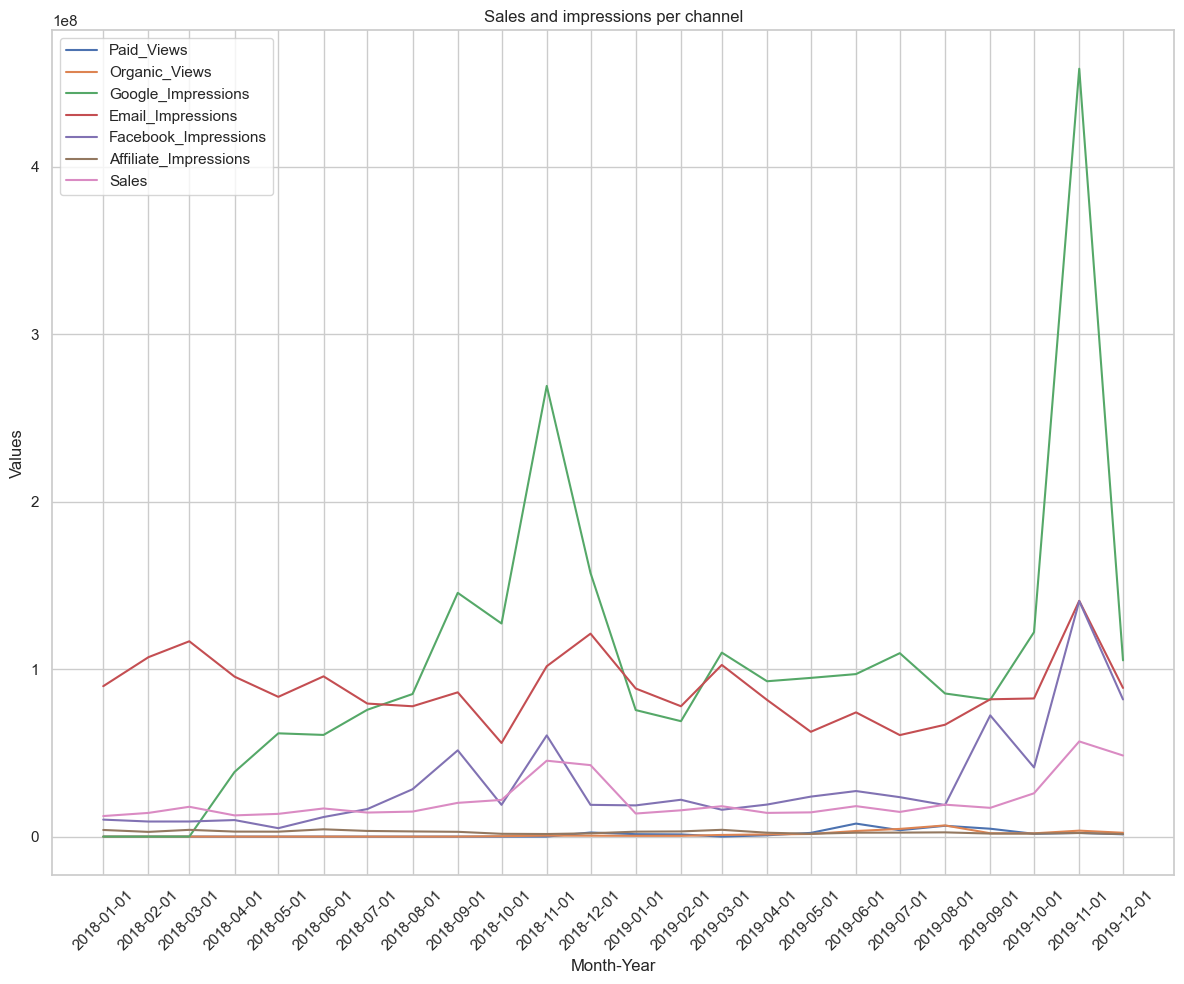

In [54]:
x = df_month_year.index.to_timestamp()
channels = ['Paid_Views', 'Organic_Views', 'Google_Impressions', 
            'Email_Impressions', 'Facebook_Impressions', 
            'Affiliate_Impressions', 'Sales']

plt.figure(figsize=(12,10))
for channel in channels:
    plt.plot(x, df_month_year[channel], label=channel)
plt.title("Sales and impressions per channel")
plt.xlabel('Month-Year')
plt.ylabel('Values')
plt.xticks(x, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

From the chart we can deduct that the channels with the highest impressions have been:<br>
- email, pretty stable during the two years of the analysis,<br>
- google, but with peaks in some months,<br>
- also facebook shows peaks in some periods.

For a better view of the trend a bar chart with only the channels email, google, facebook and sales has been created.

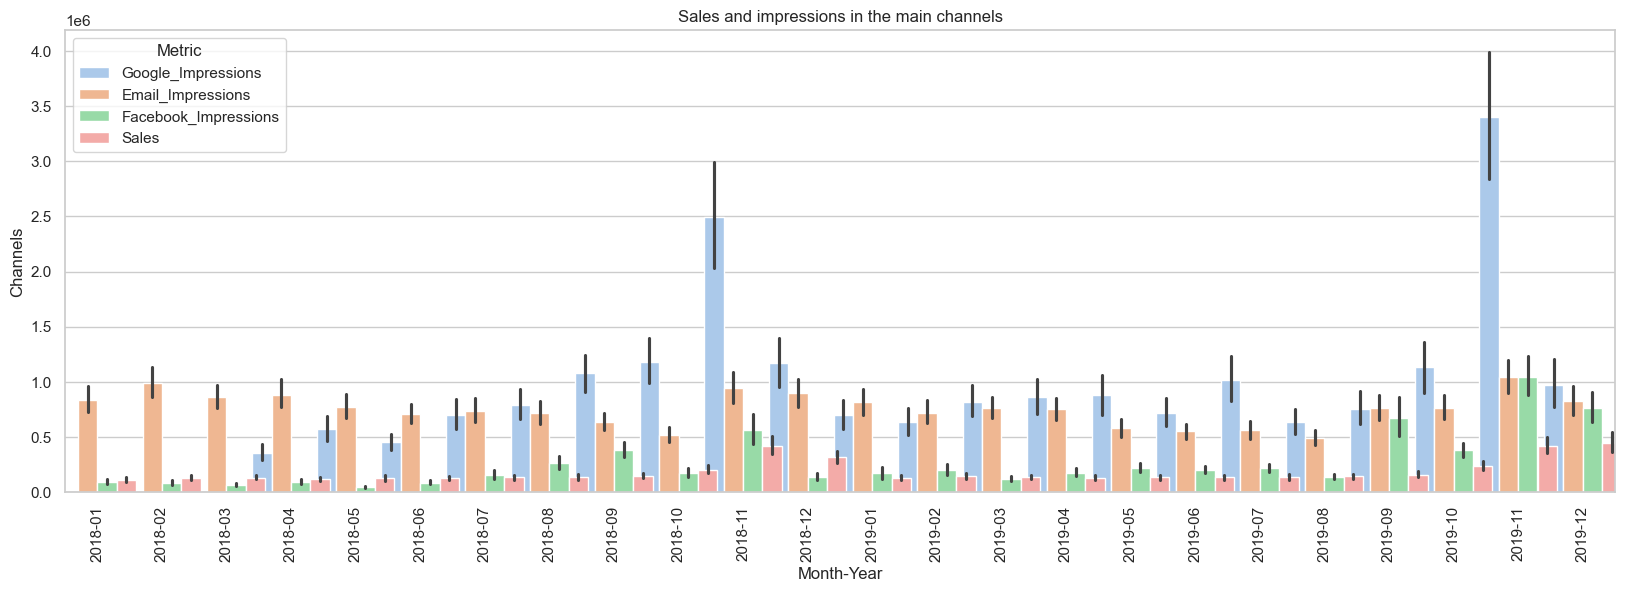

In [52]:
df_melted = pd.melt(df_filtered, id_vars=['Month-Year'], 
                    value_vars=['Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Sales'], 
                    var_name='Metric', value_name='Channels')

plt.figure(figsize = (20, 6)) 
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="Month-Year", y="Channels", hue="Metric", data=df_melted, palette="pastel", width=1.2)
plt.title("Sales and impressions in the main channels")
plt.xticks(rotation=90)
plt.show()

From the chart we deduct that the highest impressions occured in November in both years for google.<br>
The most stable data is the one of email_impressions during all the months.

For a better understanding of the trend sales according to the impression, the correlation coefficient between sales and each channel has been calculated.

In [40]:
pivot_df = df_filtered[['Sales', 'Paid_Views', 'Organic_Views', 'Google_Impressions', 
                        'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']]
correlation = pivot_df.corr()
print(correlation['Sales'].sort_values(ascending=False))

Sales                    1.000000
Google_Impressions       0.783392
Email_Impressions        0.768416
Facebook_Impressions     0.747058
Affiliate_Impressions    0.424895
Organic_Views            0.379069
Paid_Views               0.263323
Name: Sales, dtype: float64


These figures gives us confirmation of the conclusions we drew from the previous bar chart.<br>
The channels email, google, facebook are the ones with the highest correlation coefficient.

Also the Correlation between overall impressions and sales has been represented.

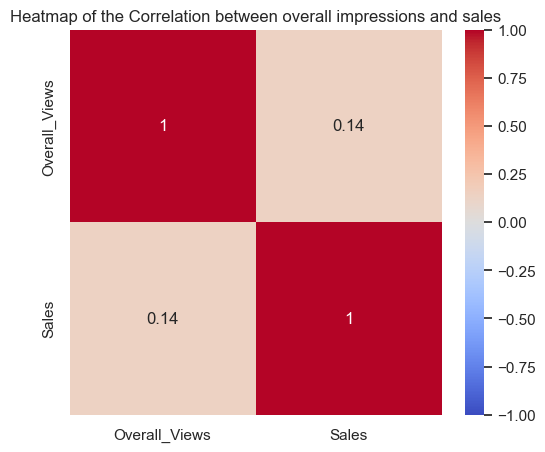

In [37]:
df_total = df_filtered.groupby('Month-Year')[['Overall_Views', 'Sales']].sum().sort_values(by='Month-Year', ascending=True)

corr_matrix = df_total[['Overall_Views', 'Sales']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar=True)
plt.title("Heatmap of the Correlation between overall impressions and sales")
plt.show()

The chart shows a low correlation between the two values and inversely proportional.

Therefore, a scatterplot that takes into account also the correlation between overall impressions and sales during the months and years has been created.

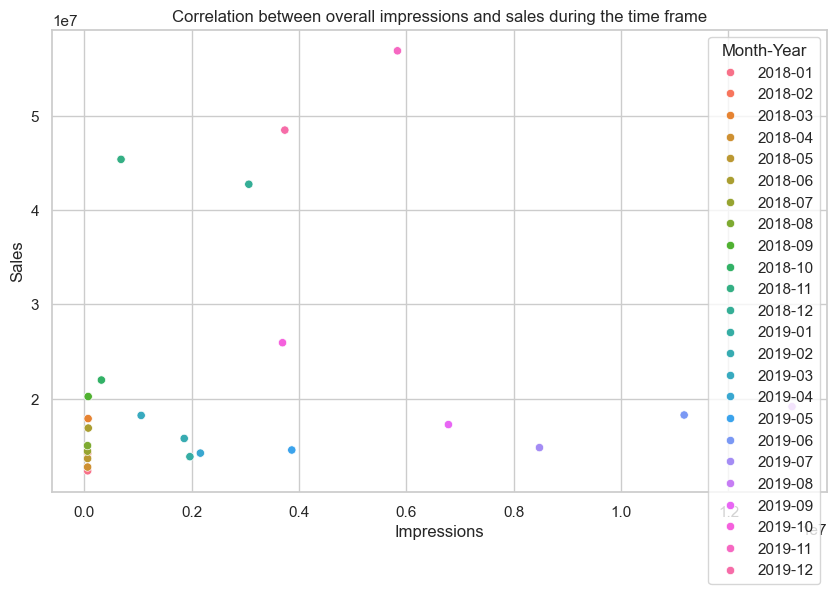

In [48]:
df_total = df_filtered.groupby('Month-Year')[['Overall_Views', 'Sales']].sum().sort_values(by='Month-Year', ascending=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_total, x='Overall_Views', y='Sales', hue='Month-Year')
plt.title('Correlation between overall impressions and sales during the time frame')
plt.xlabel('Impressions')
plt.ylabel('Sales')
plt.show()

The chart doesn't show any correlation even during the two years of the analysis.<br>
We should then continue the analysis in a more specific way on the single channels.<br>
With the previous df_month_year dataset, the correlation indexes show that:

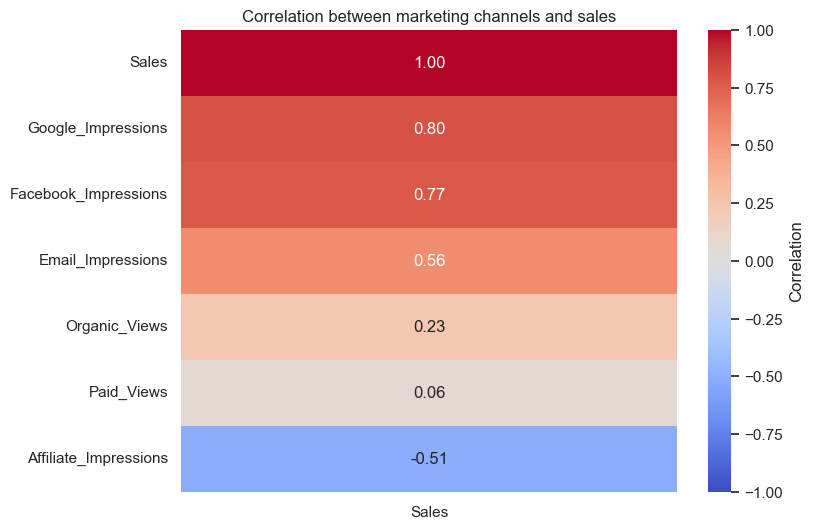

In [46]:
df_heatmap = df_filtered.groupby('Month-Year')[['Paid_Views', 'Organic_Views', 'Google_Impressions', 
                                                  'Email_Impressions', 'Facebook_Impressions', 
                                                  'Affiliate_Impressions', 'Sales']].sum().sort_values(by='Month-Year', ascending=True)

correlation_matrix = df_month_year.corr()

correlation_matrix = correlation_matrix[['Sales']].sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            cbar_kws={'label': 'Correlation'}, fmt='.2f')
plt.title('Correlation between marketing channels and sales')
plt.show()


the affiliate impressions have the worst performances in comparison to sales,<br>
the google, facebook and email impressions have the best performances.

The correlation index between channels and sales is low, but there is not necessary causation. There is a lack of further context information and therefore is not possible to identify additional decisive factors.

<b>MARKETING DATA-DRIVEN STRATEGY PROPOSAL</b>

Is it advisable to keep focusing on the channels email, google and facebook which are the ones with the best figures.<br>
Is it better to invest on the google channel especially during October-november, since are the ones with the best performances.<br>
The email newsletters had a stable performance throughout the whole year, therefore is better to continue sending them every week/month.<br>
Regarding the facebook channel, I would focus less on it in comparison with the google channel since it impacted the sales less.<br>
The strategy of the affiliates should be changed from scratch, since is it the only channel with a negative correlation index in relation to the sales.